## Beer Mug Project

Well.....this has been a learning curve for sure. Ultimately the challenge becomes how to define the 3 dimensional set of points that can be plotted as a surface using the tools of ```pyplot``` from ```matplotlib```. The standard method to do this involves using the ```meshgrid``` tool to facilitate the generation of those points. 

### Two posts from Stackoverflow

These two posts were what got things moving in the right direction. While the idea of rotating a line of some shape around an axis is straightforward the challenge lies in creating the actual data points that define that rotated surface so it can be plotted.

[open cyliinder](https://stackoverflow.com/questions/26989131/add-cylinder-to-plot)

What makes this nice is the clarity of the second and third responses. I'm intrigued that the highest voted solution still seems opaque to me while I can parse out the other solutions much more easily. It feels like I should be able to modify this model to rotate a given profile around the z axis. We'll see. 

[how meshgrid works](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)

### It must be easier in polar coordinates!

I have this sense there is an easier way to do this in polar coordinates but my grasp on the array of data points I am generating is so tentative that I'm not ready to go there yet. The link below is to an example of a plot of a donut which you would think would be great in polar coordinates and even here they convert it to a cartesian grid.

[donut plot](https://pundit.pratt.duke.edu/wiki/Python:Plotting_Surfaces)



### Dependencies

The usual...

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


### Conceptual Model

The basic concept I have at this time starts here. If you imagine a surface of revolution projected 'down' onto the x-y plane (standing up in z) the mug forms a ring. What I am doing here is using tools from ```pyplot``` - specifically ```meshgrid``` to define a set of smoothly distributed points in theta and radius where the angle theta spans the whole circle and the radius ranges from the minimum to the maximum radius for some part of the profile of my mug. Each time I change the function which defines the profile of my mug I will need to generate a new set of data points. I am going to define each function clearly in this markdown block along with the range for which it applies and the inverse of the function and then I will implement.

I **DID NOT** make sure that the first derivatives matched at the join between the functions so if that is part of the challenge that's on other users.

## The functions

### Bottom Section

$$ z_1 = 2 \cdot r_1^2$$

updated:

$$ z_1 = 2 \cdot (r_1 - 3)^2$$

Remember that r is the x value of the function that defines the hieght z. z will range from 0 to 5 cm. The inverse function is 

$$ r_1 = \sqrt{0.5 z_1}$$

updated: 

$$ r_1 = \sqrt{0.5 z_1} + 3$$

### Top section

$$ z_2 = slope2 \ cdot r_2 + y_{intercept}$$

updated:

$$ z_2 = slope2 \ cdot r_2 - y_int$$

where I will have to determine $y_{intercept}$ properly to that it connects the the previous function at z = 5 cm. This function will range from z = 5 to z = 10 cm. The inverse of this fuction is 

$$ r_2 = \frac{z_2 - y_{intercept}}{slope2}$$

updated:

$$ r_2 = \frac{z_2 + y_{intercept}{slope2}$$

I started my process with just a few steps (nsteps) to be sure things seemed to be working

In [264]:
# define number of slices along vertical axis for each function
nsteps = 50

# define range of desired z values for each function shaping the mug
range_z1 = np.linspace(0,5,nsteps)
range_z2 = np.linspace(5,10,nsteps)

### Find range of radii for the functions and splice points

I want $z_1$ = 0 when $r_1$ is 3 cm. My process will be to adjust the inverse function until I get r1_min = 3. Then I will have to go back and update.

I had some problems with irritating little errors in my inverse functions so I printed out the min and max radii for each function along with the height **and** radius at the joint to be sure I actually had them matching. Helped with debugging.

In [265]:
# function 1

r1_min = np.sqrt(0.5*range_z1[0]) + 3.
r1_max = np.sqrt(0.5*range_z1[nsteps-1]) + 3.
print("Function 1, r min: %.3f cm" % r1_min)
print("Function 1, r max: %.3f cm z max: %.3f" % (r1_max,range_z1[nsteps-1]))

# function 2
y2_int = 234.05
y2_slope = -50
r2_min = (range_z2[0] - y2_int)/(y2_slope)
r2_max = (range_z2[nsteps-1] - y2_int)/(y2_slope)
print("Function 2, r min: %.3f cm z min: %.3f" % (r2_min, range_z2[0]))
print("Function 2, r max: %.3f cm" %r2_max)

Function 1, r min: 3.000 cm
Function 1, r max: 4.581 cm z max: 5.000
Function 2, r min: 4.581 cm z min: 5.000
Function 2, r max: 4.481 cm


In [271]:
# function 1 - range of radial values

f1_radial = np.sqrt(.5*range_z1) + 3.
f2_radial = (range_z2 - y2_int)/y2_slope

# print("radial dist f1: ", f1_radial)
# print("radial dist f2: ", f2_radial)

### Mesh R and theta together

This step should be completely consistent for all plots...

In [272]:
# Set up the grid which is the projection of function 1 down onto x-y plane
theta = np.linspace(0,2*np.pi,90)
T1, R1 = np.meshgrid(theta, f1_radial)
T2, R2 = np.meshgrid(theta, f2_radial)

### Regenerate the z (height) values

I know it seems ridiculous at the moment to invert the function initially and then essentially go back the other way. Perhaps there is a simpler way to do this but because what we want to do is take some linear profile and rotate it around the z axis I think this is the process that cleanly leads to a consistent process for doing so.

The X and Y arrays for each function are just the sine and cosine of the radial values at that point. Generating the z (height) values involves

In [273]:
# Then calculate X and Y which are always related in the same way to the function above
X1 = R1 * np.cos(T1)
Y1 = R1 * np.sin(T1)

X2 = R2 * np.cos(T2)
Y2 = R2 * np.sin(T2)

# now I need to calculate the height of the surface at each of values in the projected mesh
Z1 = 2.*(R1 - 3.)**2
Z2 = y2_slope*R2 + y2_int



### The Plot

Remember that you may wish to change the view position to get a different look at the mug. I have not put a botton on the mug yet.

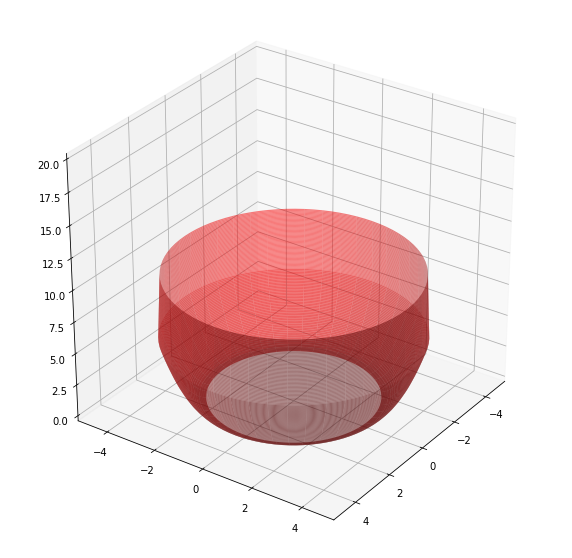

In [275]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


ax.plot_surface(X1, Y1, Z1, color = 'red', alpha = 0.6)
ax.plot_surface(X2, Y2, Z2, color = 'red', alpha = 0.5)

ax.view_init(elev = 30, azim = 35)
ax.set_zlim(0,20)
fig.set_size_inches(10, 10)
plt.show()